In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load csv file
points_df = pd.read_csv("res/2017_2018_PL_Standings.csv", index_col=False)
points_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,"54,070",Sergio Agüero - 21,Ederson,→ Champions League via league finish
1,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,"74,976",Romelu Lukaku - 16,David de Gea,→ Champions League via league finish
2,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,"67,953",Harry Kane - 30,Hugo Lloris,→ Champions League via league finish
3,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,"53,049",Mohamed Salah - 32,"Loris Karius, Simon Mignolet",→ Champions League via league finish
4,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,"41,282",Eden Hazard - 12,Thibaut Courtois,→ Europa League via cup win 1
5,6,Arsenal,38,19,6,13,74,51,23,63,1.66,68.4,50.5,17.9,0.47,"59,323",Alexandre Lacazette - 14,Petr Čech,→ Europa League via league finish
6,7,Burnley,38,14,12,12,36,39,-3,54,1.42,34.5,51.8,-17.2,-0.45,"20,688",Chris Wood - 10,Nick Pope,→ Europa League via league finish 2
7,8,Everton,38,13,10,15,44,58,-14,49,1.29,41.4,52.2,-10.8,-0.28,"38,797",Wayne Rooney - 10,Jordan Pickford,NaN
8,9,Leicester City,38,12,11,15,56,60,-4,47,1.24,48.1,49.9,-1.8,-0.05,"31,583",Jamie Vardy - 20,Kasper Schmeichel,NaN
9,10,Newcastle Utd,38,12,8,18,39,47,-8,44,1.16,45.3,53.4,-8.1,-0.21,"51,992",Ayoze Pérez - 8,Rob Elliot,NaN


In [7]:
# Drop columns not needed
points_df = points_df.drop(columns=["Top Team Scorer", "Goalkeeper","Notes"])
points_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,"54,070"
1,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,"74,976"
2,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,"67,953"
3,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,"53,049"
4,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,"41,282"
5,6,Arsenal,38,19,6,13,74,51,23,63,1.66,68.4,50.5,17.9,0.47,"59,323"
6,7,Burnley,38,14,12,12,36,39,-3,54,1.42,34.5,51.8,-17.2,-0.45,"20,688"
7,8,Everton,38,13,10,15,44,58,-14,49,1.29,41.4,52.2,-10.8,-0.28,"38,797"
8,9,Leicester City,38,12,11,15,56,60,-4,47,1.24,48.1,49.9,-1.8,-0.05,"31,583"
9,10,Newcastle Utd,38,12,8,18,39,47,-8,44,1.16,45.3,53.4,-8.1,-0.21,"51,992"


In [8]:
# Create a new column highlighting EPL calendar year
points_df = points_df.assign(Start_year=2017, End_year=2018)
points_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Start_year,End_year
0,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,"54,070",2017,2018
1,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,"74,976",2017,2018
2,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,"67,953",2017,2018
3,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,"53,049",2017,2018
4,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,"41,282",2017,2018
5,6,Arsenal,38,19,6,13,74,51,23,63,1.66,68.4,50.5,17.9,0.47,"59,323",2017,2018
6,7,Burnley,38,14,12,12,36,39,-3,54,1.42,34.5,51.8,-17.2,-0.45,"20,688",2017,2018
7,8,Everton,38,13,10,15,44,58,-14,49,1.29,41.4,52.2,-10.8,-0.28,"38,797",2017,2018
8,9,Leicester City,38,12,11,15,56,60,-4,47,1.24,48.1,49.9,-1.8,-0.05,"31,583",2017,2018
9,10,Newcastle Utd,38,12,8,18,39,47,-8,44,1.16,45.3,53.4,-8.1,-0.21,"51,992",2017,2018


In [9]:
# Convert columns to list
print(list(points_df))

['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Start_year', 'End_year']


In [10]:
# Convert columns to list
points_df2 = points_df[['Start_year', 'End_year','Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']]
points_df2

,Start_year,End_year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017,2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,"54,070"
1,2017,2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,"74,976"
2,2017,2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,"67,953"
3,2017,2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,"53,049"
4,2017,2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,"41,282"
5,2017,2018,6,Arsenal,38,19,6,13,74,51,23,63,1.66,68.4,50.5,17.9,0.47,"59,323"
6,2017,2018,7,Burnley,38,14,12,12,36,39,-3,54,1.42,34.5,51.8,-17.2,-0.45,"20,688"
7,2017,2018,8,Everton,38,13,10,15,44,58,-14,49,1.29,41.4,52.2,-10.8,-0.28,"38,797"
8,2017,2018,9,Leicester City,38,12,11,15,56,60,-4,47,1.24,48.1,49.9,-1.8,-0.05,"31,583"
9,2017,2018,10,Newcastle Utd,38,12,8,18,39,47,-8,44,1.16,45.3,53.4,-8.1,-0.21,"51,992"


In [11]:
# Encode Labels
le = LabelEncoder()
points_df3 = points_df2.copy()
points_df3["Squad"] = le.fit_transform(points_df3["Squad"])
points_df3

,Start_year,End_year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017,2018,1,10,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,"54,070"
1,2017,2018,2,11,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,"74,976"
2,2017,2018,3,16,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,"67,953"
3,2017,2018,4,9,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,"53,049"
4,2017,2018,5,4,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,"41,282"
5,2017,2018,6,0,38,19,6,13,74,51,23,63,1.66,68.4,50.5,17.9,0.47,"59,323"
6,2017,2018,7,3,38,14,12,12,36,39,-3,54,1.42,34.5,51.8,-17.2,-0.45,"20,688"
7,2017,2018,8,6,38,13,10,15,44,58,-14,49,1.29,41.4,52.2,-10.8,-0.28,"38,797"
8,2017,2018,9,8,38,12,11,15,56,60,-4,47,1.24,48.1,49.9,-1.8,-0.05,"31,583"
9,2017,2018,10,12,38,12,8,18,39,47,-8,44,1.16,45.3,53.4,-8.1,-0.21,"51,992"


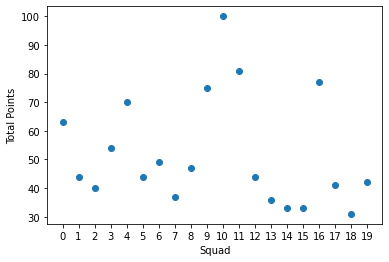

In [12]:
# Visually inspect relationship between Points and Squad
plt.scatter(points_df3.Squad, points_df3.Pts)
plt.xticks(points_df3.Squad)
plt.xlabel("Squad")
plt.ylabel("Total Points")
plt.show()

In [13]:
# Format data to meet 
X = points_df3.Squad.values.reshape(-1, 1)

# Assign the target variable, or the Salary column
y = points_df3.Pts

# Create model
model = LinearRegression()

# Fit model
model.fit(X, y)

LinearRegression()

In [14]:
# Examine shape of x
X.shape

(20, 1)

In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(20,)


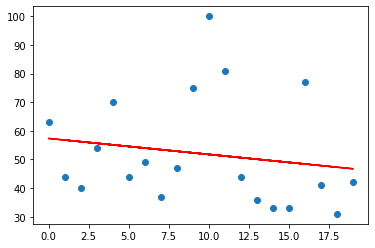

In [16]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [17]:
print(model.coef_)
print(model.intercept_)

[-0.55714286]
57.342857142857135
